## Utku Alperen ŞEN

## 20200805602

## Boat Types Recognition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import tensorflow as tf
import copy
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16
from keras import backend as K
from keras.applications.vgg16 import preprocess_input, decode_predictions

## 1.(A) İlk olarak gerekli kütüphaneleri tanımladıktan sonra dataset verilerimi train, validation ve test olarak üç bölüme ayırdım.

In [3]:
original_buoy = "C:\DeepLearning\dataset/buoy" #Orjinal buoy datasetini içeren klasör dizini
original_cruiseship = "C:\DeepLearning\dataset/cruise ship" #Orjinal cruise ship datasetini içeren klasör dizini
original_ferryboat = "C:\DeepLearning\dataset/ferry boat"   #Orjinal ferry boat datasetini içeren klasör dizini
original_freightboat = "C:\DeepLearning\dataset/freight boat"   #Orjinal freight boat datasetini içeren klasör dizini
original_gondola = "C:\DeepLearning\dataset/gondola"    #Orjinal gondola datasetini içeren klasör dizini
original_inflatableboat = "C:\DeepLearning\dataset/inflatable boat" #Orjinal inflatable boat datasetini içeren klasör dizini
original_kayak = "C:\DeepLearning\dataset/kayak"    #Orjinal kayak datasetini içeren klasör dizini
original_paperboat = "C:\DeepLearning\dataset/paper boat"   #Orjinal paper boat datasetini içeren klasör dizini
original_sailboat = "C:\DeepLearning\dataset/sailboat"  #Orjinal sailboat datasetini içeren klasör dizini

base_dir = "C:\DeepLearning\splits" #Üç bölmeye ayırmak için oluşturacağımız klasör dizini
os.mkdir(base_dir) #Train,Validation,Test için klasör oluşturuldu

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir= os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir= os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Train dosyaları için datasetteki verilerin oluşturulduğu dosyalar
train_buoy = os.path.join(train_dir, 'buoy')
os.mkdir(train_buoy)
train_cruiseship = os.path.join(train_dir, 'cruise ship')
os.mkdir(train_cruiseship)
train_ferryboat = os.path.join(train_dir, 'ferry boat')
os.mkdir(train_ferryboat)
train_freightboat = os.path.join(train_dir, 'freight boat')
os.mkdir(train_freightboat)
train_gondola = os.path.join(train_dir, 'gondola')
os.mkdir(train_gondola)
train_inflatableboat = os.path.join(train_dir, 'inflatable boat')
os.mkdir(train_inflatableboat)
train_kayak = os.path.join(train_dir, 'kayak')
os.mkdir(train_kayak)
train_paperboat = os.path.join(train_dir, 'paper boat')
os.mkdir(train_paperboat)
train_sailboat = os.path.join(train_dir, 'sail boat')
os.mkdir(train_sailboat)

#Validation dosyaları için datasetteki verilerin oluşturulduğu dosyalar
val_buoy = os.path.join(validation_dir, 'buoy')
os.mkdir(val_buoy)
val_cruiseship = os.path.join(validation_dir, 'cruise ship')
os.mkdir(val_cruiseship)
val_ferryboat = os.path.join(validation_dir, 'ferry boat')
os.mkdir(val_ferryboat)
val_freightboat = os.path.join(validation_dir, 'freight boat')
os.mkdir(val_freightboat)
val_gondola = os.path.join(validation_dir, 'gondola')
os.mkdir(val_gondola)
val_inflatableboat = os.path.join(validation_dir, 'inflatable boat')
os.mkdir(val_inflatableboat)
val_kayak = os.path.join(validation_dir, 'kayak')
os.mkdir(val_kayak)
val_paperboat = os.path.join(validation_dir, 'paper boat')
os.mkdir(val_paperboat)
val_sailboat = os.path.join(validation_dir, 'sail boat')
os.mkdir(val_sailboat)

#Test dosyaları için datasetteki verilerin oluşturulduğu dosyalar
test_buoy = os.path.join(test_dir, 'buoy')
os.mkdir(test_buoy)
test_cruiseship = os.path.join(test_dir, 'cruise ship')
os.mkdir(test_cruiseship)
test_ferryboat = os.path.join(test_dir, 'ferry boat')
os.mkdir(test_ferryboat)
test_freightboat = os.path.join(test_dir, 'freight boat')
os.mkdir(test_freightboat)
test_gondola = os.path.join(test_dir, 'gondola')
os.mkdir(test_gondola)
test_inflatableboat = os.path.join(test_dir, 'inflatable boat')
os.mkdir(test_inflatableboat)
test_kayak = os.path.join(test_dir, 'kayak')
os.mkdir(test_kayak)
test_paperboat = os.path.join(test_dir, 'paper boat')
os.mkdir(test_paperboat)
test_sailboat = os.path.join(test_dir, 'sail boat')
os.mkdir(test_sailboat)

## 1.(B) Klasörlerin içerisindeki .jpg uzantılı dosyaları farklı bir dosyaya kopyalayabilmek için .jpg dosyalarının isimlerini liste içerisine aldım.

In [5]:
buoy_list = os.listdir(original_buoy)
cruiseship_list = os.listdir(original_cruiseship)
ferryboat_list = os.listdir(original_ferryboat)
freightboat_list = os.listdir(original_freightboat)     #Asıl datasetimin dosyalarını .jpg uzantılı dosyaların isimlerini alabilmek için bir liste içerisine aldım
gondola_list = os.listdir(original_gondola)
inflatableboat_list = os.listdir(original_inflatableboat)
kayak_list = os.listdir(original_kayak)
paperboat_list = os.listdir(original_paperboat)
sailboat_list = os.listdir(original_sailboat)

## 1.(C) .jpg uzantılı dosyaların kopyalandığı kod bölümü.

In [6]:
#Dosyaları orjinal buoy dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in buoy_list[:30]]
for fname in fnames:
    src = os.path.join(original_buoy, fname)
    dst = os.path.join(train_buoy, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in buoy_list[30:55]]
for fname in fnames:
    src = os.path.join(original_buoy, fname)                                #BUOY
    dst = os.path.join(val_buoy, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in buoy_list[55:68]]
for fname in fnames:
    src = os.path.join(original_buoy, fname)
    dst = os.path.join(test_buoy, fname)
    shutil.copyfile(src, dst)


#Dosyaları orjinal cruise ship dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in cruiseship_list[:150]]
for fname in fnames:
    src = os.path.join(original_cruiseship, fname)
    dst = os.path.join(train_cruiseship, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in cruiseship_list[170:205]]            #CRUISE SHIP
for fname in fnames:
    src = os.path.join(original_cruiseship, fname)
    dst = os.path.join(val_cruiseship, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in cruiseship_list[205:239]]
for fname in fnames:
    src = os.path.join(original_cruiseship, fname)
    dst = os.path.join(test_cruiseship, fname)
    shutil.copyfile(src, dst)


#Dosyaları orjinal ferry boat dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in ferryboat_list[:54]]
for fname in fnames:
    src = os.path.join(original_ferryboat, fname)
    dst = os.path.join(train_ferryboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in ferryboat_list[54:70]]          #FERRY BOAT
for fname in fnames:
    src = os.path.join(original_ferryboat, fname)
    dst = os.path.join(val_ferryboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in ferryboat_list[70:81]]
for fname in fnames:
    src = os.path.join(original_ferryboat, fname)
    dst = os.path.join(test_ferryboat, fname)
    shutil.copyfile(src, dst)


#Dosyaları orjinal freight boat dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in freightboat_list[:20]]
for fname in fnames:
    src = os.path.join(original_freightboat, fname)
    dst = os.path.join(train_freightboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in freightboat_list[20:25]]                #FREIGHT BOAT
for fname in fnames:
    src = os.path.join(original_freightboat, fname)
    dst = os.path.join(val_freightboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in freightboat_list[25:29]]
for fname in fnames:
    src = os.path.join(original_freightboat, fname)
    dst = os.path.join(test_freightboat, fname)
    shutil.copyfile(src, dst)


#Dosyaları orjinal gondola dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in gondola_list[:160]]
for fname in fnames:
    src = os.path.join(original_gondola, fname)
    dst = os.path.join(train_gondola, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in gondola_list[160:200]]           #GONDOLA
for fname in fnames:
    src = os.path.join(original_gondola, fname)
    dst = os.path.join(val_gondola, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in gondola_list[200:242]]
for fname in fnames:
    src = os.path.join(original_gondola, fname)
    dst = os.path.join(test_gondola, fname)
    shutil.copyfile(src, dst)


#Dosyaları orjinal inflatable boat dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in inflatableboat_list[:14]]
for fname in fnames:
    src = os.path.join(original_inflatableboat, fname)
    dst = os.path.join(train_inflatableboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in inflatableboat_list[14:18]]          #INFLATABLE BOAT
for fname in fnames:
    src = os.path.join(original_inflatableboat, fname)
    dst = os.path.join(val_inflatableboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in inflatableboat_list[18:21]]
for fname in fnames:
    src = os.path.join(original_inflatableboat, fname)
    dst = os.path.join(test_inflatableboat, fname)
    shutil.copyfile(src, dst)


#Dosyaları orjinal kayak dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in kayak_list[:155]]
for fname in fnames:
    src = os.path.join(original_kayak, fname)
    dst = os.path.join(train_kayak, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in kayak_list[155:205]]                     #KAYAK
for fname in fnames:
    src = os.path.join(original_kayak, fname)
    dst = os.path.join(val_kayak, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in kayak_list[205:254]]
for fname in fnames:
    src = os.path.join(original_kayak, fname)
    dst = os.path.join(test_kayak, fname)
    shutil.copyfile(src, dst)


#Dosyaları orjinal paper boat dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in paperboat_list[:24]]
for fname in fnames:
    src = os.path.join(original_paperboat, fname)
    dst = os.path.join(train_paperboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in paperboat_list[24:32]]                  #PAPER BOAT
for fname in fnames:
    src = os.path.join(original_paperboat, fname)
    dst = os.path.join(val_paperboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in paperboat_list[32:40]]
for fname in fnames:
    src = os.path.join(original_paperboat, fname)
    dst = os.path.join(test_paperboat, fname)
    shutil.copyfile(src, dst)


#Dosyaları orjinal sail boat dataset içerisinden train,validation,test dosyalarının içerisine kopyaladım
fnames = ['{}'.format(i) for i in sailboat_list[:293]]
for fname in fnames:
    src = os.path.join(original_sailboat, fname)
    dst = os.path.join(train_sailboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in sailboat_list[293:390]]                 #SAIL BOAT
for fname in fnames:
    src = os.path.join(original_sailboat, fname)
    dst = os.path.join(val_sailboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in sailboat_list[390:488]]
for fname in fnames:
    src = os.path.join(original_sailboat, fname)
    dst = os.path.join(test_sailboat, fname)
    shutil.copyfile(src, dst)

## 2. Common sense baseline hesaplaması için basit bir olasılık hesaplaması yaptım. Benim datasetimde toplam 9 class ve 1462 adet .jpg uzantılı dosya bulunuyor. Yapay zeka programımın her bir class'ı seçme olasılığı ile seçmeme olasılığını toplayıp 100 ile çarptığımda bir olasılık değeri gelmiş oldu. Hesaplamalarım sonucunda %32 değerini buldum. Modelimin yenmesi gerektiği ve minimum başarı oranı %32 oranını geçtikten sonra olmaktadır.

In [ ]:
# Seçme Olasılığı: ((68/1462)*(239/1462)*(81/1462)*(29/1462)*(242/1462)*(21/1462)*(254/1462)*(40/1462)*(488/1462))
# Seçmeme Olasılığı: ((1-(68/1462))*(1-(239/1462)*(1-(81/1462)*(1-(29/1462)*(1-(242/1462)*(1-(21/1462)
#  *(1-(254/1462)*(1-(40/1462)*(1-(488/1462))
# Toplam olasılık: (Seçme Olasılığı + Seçmeme Olasılığı) * 100

## 3. Projeme tanımladığım CNN Modeli.

In [58]:
#Oluşturulan Model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

## 4. Modelimin katmanlarının özet çıktısı.

In [18]:
model.summary()  #Modelimizin özeti

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## 5.(A) Modelimi eğitebilmek için öncelikle derliyorum.

In [19]:
#Modelimizi derliyoruz
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

## 5.(B) Train ve Validation dosyalarımın boyutlarını ve batch_size değerlerini veriyorum.

In [20]:
#ImageDataGenerator sınıfı ile normalizasyon işlemini gerçekleştiriyorum
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

val_generator = test_data_gen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 900 images belonging to 9 classes.
Found 280 images belonging to 9 classes.


## 5.(C) Verilerimin hangi boyutta olduğunu kontrol ettiğim kısım

In [21]:
#Batch Shape
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in val_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 9)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 9)


## 5.(D) Modelimin eğitimini gerçekleştiriyorum.

In [22]:
#Modelimizin eğitimini gerçekleştiriyoruz
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=val_generator,
    validation_steps=10)

C:\Users\ALPEREN\AppData\Local\Temp\ipykernel_19436\248505733.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
20/20 [==============================] - 13s 633ms/step - loss: 1.9360 - acc: 0.2950 - val_loss: 1.9114 - val_acc: 0.2950
Epoch 2/20
20/20 [==============================] - 11s 546ms/step - loss: 1.7719 - acc: 0.3625 - val_loss: 1.7852 - val_acc: 0.3700
Epoch 3/20
20/20 [==============================] - 10s 527ms/step - loss: 1.7056 - acc: 0.3725 - val_loss: 1.7444 - val_acc: 0.3750
Epoch 4/20
20/20 [==============================] - 10s 509ms/step - loss: 1.5688 - acc: 0.4275 - val_loss: 1.7829 - val_acc: 0.4400
Epoch 5/20
20/20 [==============================] - 10s 487ms/step - loss: 1.5526 - acc: 0.4925 - val_loss: 1.6115 - val_acc: 0.4600
Epoch 6/20
20/20 [==============================] - 10s 498ms/step - loss: 1.5155 - acc: 0.4775 - val_loss: 1.6531 - val_acc: 0.4700
Epoch 7/20
20/20 [==============================] - 10s 485ms/step - loss: 1.5122 - acc: 0.4725 - val_loss: 1.6588 - val_acc: 0.4450
Epoch 8/20
20/20 [==============================] - 10s 501ms/step - 

In [23]:
#Modelimin sonradan tekrardan kullanılabilmesi için kaydediyorum
model.save('C:/DeepLearning/boats')

INFO:tensorflow:Assets written to: C:/DeepLearning/boats\assets


INFO:tensorflow:Assets written to: C:/DeepLearning/boats\assets


## 5.(E) Modelimin Training Loss ve Validation Loss , Training Accuracy ve Validation Accuracy grafiğini çizdiriyorum. Grafiğe baktığımda overfitting durumunun 11. epochdan sonra olduğunu tespit ettim.

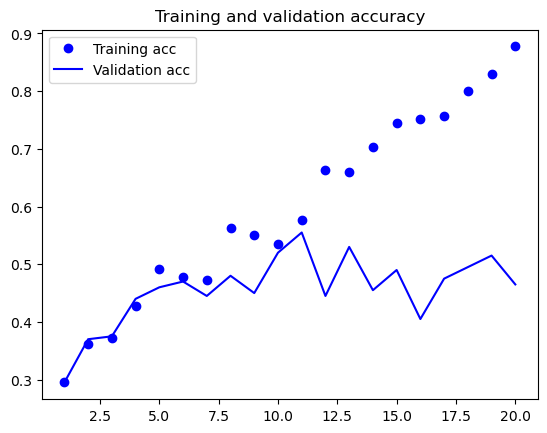

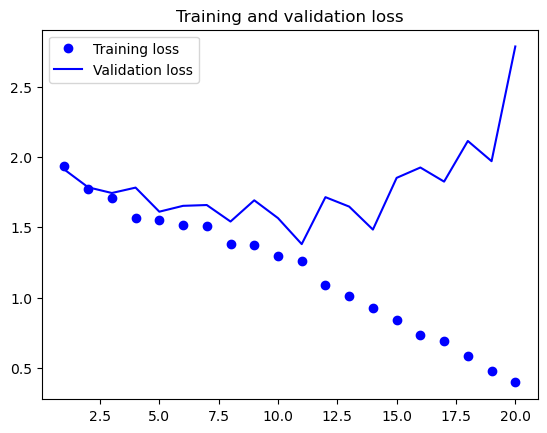

In [24]:
#Training acc,Validation acc, Training loss, Validation loss çizdirmek için

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6.(A) Train ve Validation verilerini bir araya getirebilmek için yeniden bir dosya açıp tüm train ve validation verilerimi dosyanın içerisine kopyaladım.

In [52]:
#Train ve Validation verilerini birleştirebilmek için yeniden dosya dizinleri oluşturuyorum ve
# verilerimi bunların içerisinde topluyorum.
train_val_dir = r"C:\DeepLearning\splits\train_val_total"
os.mkdir(train_val_dir)

train_val_buoy = os.path.join(train_val_dir, "train_val_buoy")
os.mkdir(train_val_buoy)
train_val_cruiseship = os.path.join(train_val_dir, "train_val_cruiseship")
os.mkdir(train_val_cruiseship)
train_val_ferryboat = os.path.join(train_val_dir, "train_val_ferryboat")
os.mkdir(train_val_ferryboat)
train_val_freightboat = os.path.join(train_val_dir, "train_val_freightboat")
os.mkdir(train_val_freightboat)
train_val_gondola = os.path.join(train_val_dir, "train_val_gondola")
os.mkdir(train_val_gondola)
train_val_inflatableboat = os.path.join(train_val_dir, "train_val_inflatableboat")
os.mkdir(train_val_inflatableboat)
train_val_kayak = os.path.join(train_val_dir, "train_val_kayak")
os.mkdir(train_val_kayak)
train_val_paperboat = os.path.join(train_val_dir, "train_val_paperboat")
os.mkdir(train_val_paperboat)
train_val_sailboat = os.path.join(train_val_dir, "train_val_sailboat")
os.mkdir(train_val_sailboat)

In [53]:
#Train verilerini yeni oluşturduğum train_val_total dosyasına kopyalıyorum

fnames = ['{}'.format(i) for i in os.listdir(train_buoy)]
for fname in fnames:
    src = os.path.join(train_buoy, fname)
    dst = os.path.join(train_val_buoy, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(train_cruiseship)]
for fname in fnames:
    src = os.path.join(train_cruiseship, fname)                                
    dst = os.path.join(train_val_cruiseship, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(train_ferryboat)]
for fname in fnames:
    src = os.path.join(train_ferryboat, fname)
    dst = os.path.join(train_val_ferryboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(train_freightboat)]
for fname in fnames:
    src = os.path.join(train_freightboat, fname)
    dst = os.path.join(train_val_freightboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(train_gondola)]
for fname in fnames:
    src = os.path.join(train_gondola, fname)
    dst = os.path.join(train_val_gondola, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(train_inflatableboat)]
for fname in fnames:
    src = os.path.join(train_inflatableboat, fname)
    dst = os.path.join(train_val_inflatableboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(train_kayak)]
for fname in fnames:
    src = os.path.join(train_kayak, fname)
    dst = os.path.join(train_val_kayak, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(train_paperboat)]
for fname in fnames:
    src = os.path.join(train_paperboat, fname)
    dst = os.path.join(train_val_paperboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(train_sailboat)]
for fname in fnames:
    src = os.path.join(train_sailboat, fname)
    dst = os.path.join(train_val_sailboat, fname)
    shutil.copyfile(src, dst)

In [54]:
#Validation değerlerini oluşturduğum yeni train_val_total klasörüne kopyalıyorum

fnames = ['{}'.format(i) for i in os.listdir(val_buoy)]
for fname in fnames:
    src = os.path.join(val_buoy, fname)
    dst = os.path.join(train_val_buoy, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(val_cruiseship)]
for fname in fnames:
    src = os.path.join(val_cruiseship, fname)                                
    dst = os.path.join(train_val_cruiseship, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(val_ferryboat)]
for fname in fnames:
    src = os.path.join(val_ferryboat, fname)
    dst = os.path.join(train_val_ferryboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(val_freightboat)]
for fname in fnames:
    src = os.path.join(val_freightboat, fname)
    dst = os.path.join(train_val_freightboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(val_gondola)]
for fname in fnames:
    src = os.path.join(val_gondola, fname)
    dst = os.path.join(train_val_gondola, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(val_inflatableboat)]
for fname in fnames:
    src = os.path.join(val_inflatableboat, fname)
    dst = os.path.join(train_val_inflatableboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(val_kayak)]
for fname in fnames:
    src = os.path.join(val_kayak, fname)
    dst = os.path.join(train_val_kayak, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(val_paperboat)]
for fname in fnames:
    src = os.path.join(val_paperboat, fname)
    dst = os.path.join(train_val_paperboat, fname)
    shutil.copyfile(src, dst)

fnames = ['{}'.format(i) for i in os.listdir(val_sailboat)]
for fname in fnames:
    src = os.path.join(val_sailboat, fname)
    dst = os.path.join(train_val_sailboat, fname)
    shutil.copyfile(src, dst)

## 6.(B) Tekrardan dosyamın boyutunu düzenleyip modelimi eğitiyorum.

In [65]:
#Tekrardan verileri generatorden geçiriyorum
train_datagen = ImageDataGenerator(rescale=1./255)
train_val_generator = train_datagen.flow_from_directory(
        train_val_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')

Found 1180 images belonging to 9 classes.


In [66]:
#Modelimizi derliyoruz
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

In [70]:
history = model.fit(
    train_val_generator,
    steps_per_epoch=20,
    epochs=25)

Epoch 1/25
20/20 [==============================] - 7s 356ms/step - loss: 0.3378 - acc: 0.8975
Epoch 2/25
20/20 [==============================] - 7s 343ms/step - loss: 0.3337 - acc: 0.8775
Epoch 3/25
20/20 [==============================] - 7s 353ms/step - loss: 0.2898 - acc: 0.9050
Epoch 4/25
20/20 [==============================] - 7s 352ms/step - loss: 0.1900 - acc: 0.9375
Epoch 5/25
20/20 [==============================] - 8s 379ms/step - loss: 0.2176 - acc: 0.9175
Epoch 6/25
20/20 [==============================] - 8s 379ms/step - loss: 0.1804 - acc: 0.9400
Epoch 7/25
20/20 [==============================] - 8s 378ms/step - loss: 0.1578 - acc: 0.9575
Epoch 8/25
20/20 [==============================] - 8s 379ms/step - loss: 0.1851 - acc: 0.9325
Epoch 9/25
20/20 [==============================] - 8s 382ms/step - loss: 0.1811 - acc: 0.9300
Epoch 10/25
20/20 [==============================] - 8s 386ms/step - loss: 0.2337 - acc: 0.9350
Epoch 11/25
20/20 [==============================

## 7. Modelimin test verileri üzerindeki performansını gözlemledim.

In [71]:
#Test verilerini generatör işleminden geçiriyorum
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')

Found 262 images belonging to 9 classes.


In [72]:
#Test verilerinin performansını deniyorum
test_loss,test_acc=model.evaluate(test_generator)
print(test_acc)

14/14 [==============================] - 5s 327ms/step - loss: 3.8677 - acc: 0.5153
0.5152671933174133


## 8.(A) Modelimde oluşan overfitting durumunu giderebilmek için modelime Dropout ekledim. Ardından modelimi tekrar eğitip grafiklerini çizdirdim.

In [73]:
#Overfitting gidermek için modelime DropOut ekliyorum

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

In [80]:
#Overfitting gidermek için augmentation işlemi uyguluyorum
#Augmentation işlemi

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

trains_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)
history = model.fit_generator(
    trains_generator,
    steps_per_epoch=20,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=10)


Found 900 images belonging to 9 classes.
Found 280 images belonging to 9 classes.


C:\Users\ALPEREN\AppData\Local\Temp\ipykernel_19436\2751355377.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
20/20 [==============================] - 11s 551ms/step - loss: 0.8521 - acc: 0.7025 - val_loss: 2.1464 - val_acc: 0.4400
Epoch 2/50
20/20 [==============================] - 12s 602ms/step - loss: 1.0170 - acc: 0.6700 - val_loss: 1.9546 - val_acc: 0.4600
Epoch 3/50
20/20 [==============================] - 11s 563ms/step - loss: 0.8990 - acc: 0.6825 - val_loss: 2.4771 - val_acc: 0.4300
Epoch 4/50
20/20 [==============================] - 11s 566ms/step - loss: 0.8780 - acc: 0.7100 - val_loss: 2.3588 - val_acc: 0.4450
Epoch 5/50
20/20 [==============================] - 12s 577ms/step - loss: 0.8886 - acc: 0.7325 - val_loss: 2.2093 - val_acc: 0.4150
Epoch 6/50
20/20 [==============================] - 11s 554ms/step - loss: 0.8152 - acc: 0.7200 - val_loss: 2.2539 - val_acc: 0.3600
Epoch 7/50
20/20 [==============================] - 10s 506ms/step - loss: 0.6955 - acc: 0.7725 - val_loss: 2.5376 - val_acc: 0.4100
Epoch 8/50
20/20 [==============================] - 10s 483ms/step - 

## 8.(B) Modelimin grafiğini çizdirdiğimde accuracy değerlerinin %96-%97 olduğunu gözlemledim ve overfitting durumunun kalkmış olduğunu gördüm.

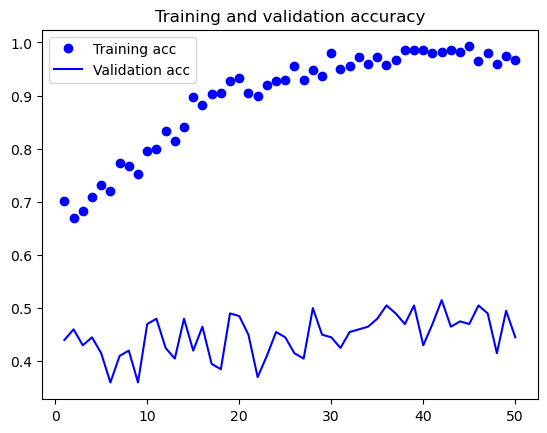

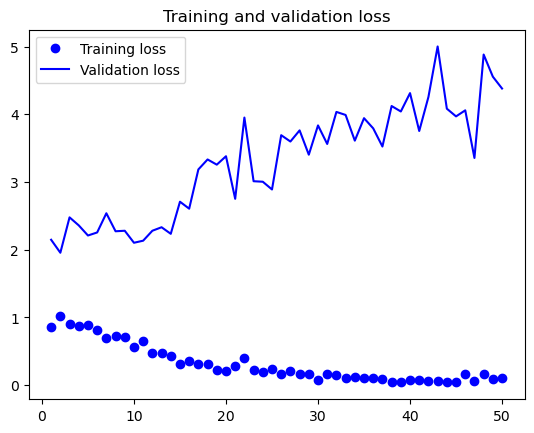

In [81]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [82]:
#Modelimi kaydediyorum
model.save('C:/DeepLearning/overfitting_boats')

INFO:tensorflow:Assets written to: C:/DeepLearning/overfitting_boats\assets


INFO:tensorflow:Assets written to: C:/DeepLearning/overfitting_boats\assets


## 8.(C) Dropout eklediğim modelimin test verileri üzerindeki performansını gözlemledim.

In [85]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')
#Test verilerinin performansını deniyorum
test_loss,test_acc=model.evaluate(test_generator, steps=10)
print(test_acc)

Found 262 images belonging to 9 classes.
10/10 [==============================] - 3s 256ms/step - loss: 1.9718 - acc: 0.3550
0.35499998927116394


## 9.(A) Imagenet üzerinde eğitilmiş VGG16 ağını projeme dahil ettim ve konvolüsyonel tabanını (convbase) aldım.

In [41]:
#VGG16
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',                       #Modeli imagenet üzerinde başlatıyorum       
                 include_top=False,
                 input_shape=(150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## 9.(B) Klasörlerimin içerisindeki veri sayısını gösterdiğim kısım.

In [42]:
print(len(os.listdir(r"C:\DeepLearning\splits\test\buoy")))
print(len(os.listdir(r"C:\DeepLearning\splits\test\cruise ship")))
print(len(os.listdir(r"C:\DeepLearning\splits\test\ferry boat")))
print(len(os.listdir(r"C:\DeepLearning\splits\test\freight boat")))
print(len(os.listdir(r"C:\DeepLearning\splits\test\gondola")))
print(len(os.listdir(r"C:\DeepLearning\splits\test\inflatable boat")))
print(len(os.listdir(r"C:\DeepLearning\splits\test\kayak")))
print(len(os.listdir(r"C:\DeepLearning\splits\test\paper boat")))
print(len(os.listdir(r"C:\DeepLearning\splits\test\sail boat")))

13
34
11
4
42
3
49
8
98


## 9.(C) (None,None,None,None) boyutundan (None,None) boyutuna geçebilmek için bir fonksiyon ekledim.

In [43]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 100

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,9))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size= batch_size,
        class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
    

## 9.(D) Dosyalarımın içerisinde bulunan  veri sayısını kontrol ettiğim kısım.

In [44]:
train_features, train_labels = extract_features(train_dir, 900)
validation_features, validation_labels = extract_features(validation_dir, 280)
test_features, test_labels = extract_features(test_dir, 262)

Found 900 images belonging to 9 classes.
4/4 [==============================] - 3s 838ms/step
Found 280 images belonging to 9 classes.
3/3 [==============================] - 3s 811ms/step
Found 262 images belonging to 9 classes.
2/2 [==============================] - 3s 1s/step


## 9.(E) Klasörlerimi yeniden boyutlandırdım ve öncelikle dropout eklenmiş CNN modelini gözlemlemek istedim.

In [45]:
train_features = np.reshape(train_features, (900, 4*4* 512))
validation_features = np.reshape(validation_features, (280, 4*4* 512))
test_features = np.reshape(test_features, (262, 4*4* 512))

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer= optimizers.RMSprop(1e-4),
              metrics=['acc'])

model.summary()
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 2,099,721
Trainable params: 2,099,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
45/45 [==============================] - 1s 15ms/step - loss: 1.5706 - acc: 0.4989 - val_loss: 1.2669 - val_acc: 0.6179
Epoch 2/30
45/45 [==============================] - 1s 12ms/step - loss: 1.1041 - acc: 0.6700 - val_loss: 1.1068 - val_acc: 0.6786
Epoch 3/30
45/45 [============================

## 9.(F) Dropout eklenmiş CNN modelinin grafiğini çizdirdim.

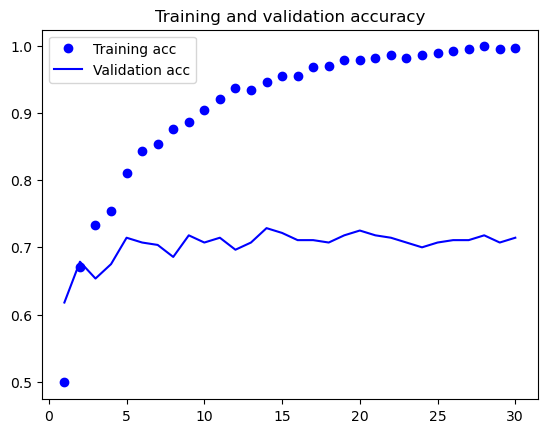

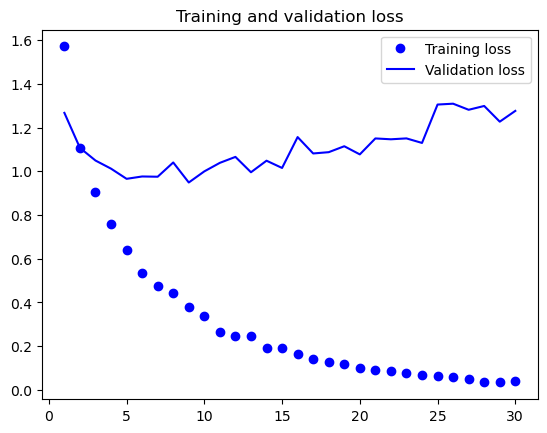

In [46]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## 9.(G) Bu bölümde convbase üzerine kendi fully connected classifier modelimi ekledim.

In [47]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten()),
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(9,activation="softmax"))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               4194816   
                                                                 
 dense_11 (Dense)            (None, 9)                 4617      
                                                                 
Total params: 18,914,121
Trainable params: 18,914,121
Non-trainable params: 0
_________________________________________________________________


## 9.(H) Convbase tabanını dondurduğum kısım.

In [48]:
#CONVBASE Dondurmak için
print(len(model.trainable_weights))
conv_base.trainable=False
print(len(model.trainable_weights))

30
4


## 9.(I) Ardından oluşturduğum modelimi eğittim.

In [49]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150,150),
                  batch_size=20,
                  class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                      validation_dir,
                      target_size=(150, 150),
                      batch_size=20,
                      class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
          train_generator,
          steps_per_epoch=20,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10)

Found 900 images belonging to 9 classes.
Found 280 images belonging to 9 classes.


C:\Users\ALPEREN\AppData\Local\Temp\ipykernel_18832\443411093.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
20/20 [==============================] - 20s 994ms/step - loss: 3.5546 - acc: 0.4450 - val_loss: 2.1549 - val_acc: 0.4750
Epoch 2/30
20/20 [==============================] - 25s 1s/step - loss: 1.1542 - acc: 0.6475 - val_loss: 1.1622 - val_acc: 0.6050
Epoch 3/30
20/20 [==============================] - 24s 1s/step - loss: 0.7490 - acc: 0.7675 - val_loss: 1.4012 - val_acc: 0.6000
Epoch 4/30
20/20 [==============================] - 23s 1s/step - loss: 0.7933 - acc: 0.7700 - val_loss: 1.0535 - val_acc: 0.7300
Epoch 5/30
20/20 [==============================] - 23s 1s/step - loss: 0.6456 - acc: 0.8000 - val_loss: 1.8691 - val_acc: 0.5650
Epoch 6/30
20/20 [==============================] - 23s 1s/step - loss: 0.6087 - acc: 0.8050 - val_loss: 1.1136 - val_acc: 0.7050
Epoch 7/30
20/20 [==============================] - 23s 1s/step - loss: 0.3252 - acc: 0.8925 - val_loss: 2.0832 - val_acc: 0.5700
Epoch 8/30
20/20 [==============================] - 23s 1s/step - loss: 0.3708 - acc: 0

## 9.(J) Modelimin grafiğini çizdirdim. Overfitting durumunun kalktığını gözlemledim.

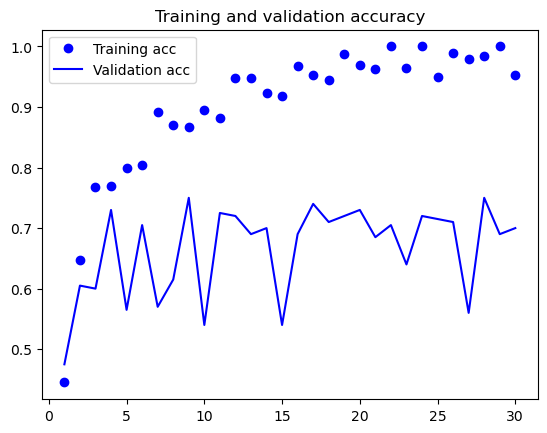

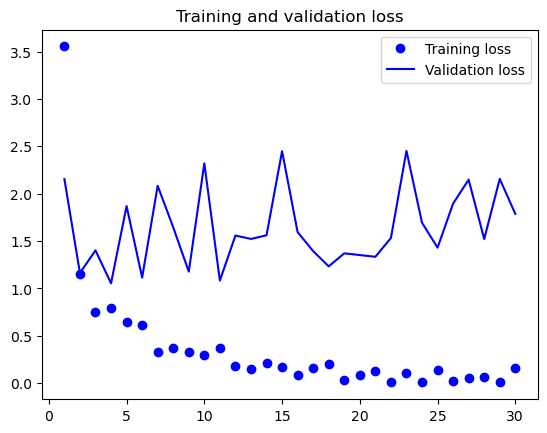

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## 9.(K) Train ve Validation verilerini birleştirip modeli eğittim.

In [55]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_val_generator = train_datagen.flow_from_directory(
        train_val_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

history = model.fit(
    train_val_generator,
    steps_per_epoch=20,
    epochs=25)


Found 1180 images belonging to 9 classes.
Epoch 1/25
20/20 [==============================] - 14s 683ms/step - loss: 0.4768 - acc: 0.9025
Epoch 2/25
20/20 [==============================] - 13s 647ms/step - loss: 0.3228 - acc: 0.9200
Epoch 3/25
20/20 [==============================] - 15s 739ms/step - loss: 0.1741 - acc: 0.9425
Epoch 4/25
20/20 [==============================] - 16s 790ms/step - loss: 0.1745 - acc: 0.9575
Epoch 5/25
20/20 [==============================] - 15s 758ms/step - loss: 0.0956 - acc: 0.9725
Epoch 6/25
20/20 [==============================] - 15s 754ms/step - loss: 0.1240 - acc: 0.9575
Epoch 7/25
20/20 [==============================] - 16s 783ms/step - loss: 0.0802 - acc: 0.9850
Epoch 8/25
20/20 [==============================] - 17s 863ms/step - loss: 0.0185 - acc: 1.0000
Epoch 9/25
20/20 [==============================] - 17s 843ms/step - loss: 0.0664 - acc: 0.9875
Epoch 10/25
20/20 [==============================] - 17s 828ms/step - loss: 0.0324 - acc: 0.99

## 9.(L) Modelimdeki test verilerinin performansını gözlemlediğim kısım.

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')
#Test verilerinin performansını deniyorum
test_loss,test_acc=model.evaluate(test_generator, steps=10)
print(test_acc)

Found 262 images belonging to 9 classes.
10/10 [==============================] - 6s 599ms/step - loss: 1.3173 - acc: 0.7250
0.7250000238418579


## 10. Öncelikle toplu şekilde gelen datasetimin verilerini üç bölüme ayırmam gerekti. Ardından modelimin yenmesi gerektiği minimum başarı oranını buldum. Elimde 9 class olduğu için başarı oranım bir miktar düşük çıktı. Amacım bir recognition olduğu için oluşturduğum modeller sınıflandırma(softmax) içermesi gerekiyordu. Modelimin katman çıktısını elimde kaç tane sınıf varsa ona göre düzenledim. Modelimde genellikle (150,150) boyutunu tercih ettim. İlk başta eğittiğim modelde belli bir epoch değerinin üzerine çıktığında overfitting durumu yaşanıyordu. Bunu giderebilmek için modelime bir kaç eklenti yaptım(dropout vb.). Bazı bölümlerde istenen accuracy ulaşamadım ancak bir kaç boyut düzenlemesi ve epoch düzenlemeleri ile bu sorunları giderdim.

## Ödevde benden train ve validation verilerini birleştirip eğitmem isteniyordu. Önceden belirlediğim epoch değeriyle bu verilerimi eğittim ve test verilerinin performansına baktım. Accuracy değerlerinin iyi durumda olduğunu gördüm.

## Imagenet üzerinde eğitilmiş olan VGG16 ağı ile çalışmaya başladığımda modelimin başarı oranın daha da arttığını gördüm. Sonuç olarak eğitilmiş bir yapay zeka modeli oluşturmaya çalıştım.